In [1]:
import numpy as np
from numpy.linalg import inv, det
import matplotlib.pyplot as plt
from copy import copy
import random
%matplotlib inline 

## Генерация стохастической матрицы

In [2]:
def generate_stochastic_matrix(size):
    matrix = np.random.rand(size, size)
    
    for i in range(size):
        matrix[i] = matrix[i] / np.sum(matrix[i])
        
    return matrix

## Моделирование игры

In [3]:
def model_game(matrix, starter_opinion, epsilon=0.000001):
    prev_opinion = np.zeros(len(starter_opinion))
    cur_opinion = copy(starter_opinion)
    
    cur_matrix = np.eye(matrix.shape[0])
    
    while np.max(np.abs(cur_opinion - prev_opinion)) > epsilon:
        cur_matrix = cur_matrix.dot(matrix)
        
        prev_opinion = cur_opinion
        
        cur_opinion = cur_matrix.dot(starter_opinion)
    
    return cur_matrix

## Генерация исходных векторов по заданным параметрам

In [4]:
def distribute_players(players_count, agents_count):
    distr = np.append(list(range(players_count + 1)),
                      np.random.randint(players_count + 1, size=agents_count - players_count - 1))
    
    np.random.shuffle(distr)
    
    return distr

def floating_rand(low, high):
    return random.random() * (high - low) + low

def generate_opinions(distribution, first_limits, second_limits, nobody_limits):
    opinions = []
    
    for i in distribution:
        if i == 0:
            limits = nobody_limits
        elif i == 1:
            limits = first_limits
        elif i == 2:
            limits = second_limits
            
        opinions.append(floating_rand(*limits))
        
    return np.array(opinions)

## Выполнение задания

[[0.148 0.075 0.09  0.13  0.065 0.04  0.014 0.126 0.177 0.136]
 [0.088 0.144 0.165 0.038 0.15  0.04  0.09  0.157 0.081 0.047]
 [0.067 0.143 0.036 0.119 0.033 0.005 0.207 0.065 0.16  0.164]
 [0.109 0.142 0.082 0.042 0.201 0.093 0.041 0.059 0.192 0.039]
 [0.142 0.063 0.033 0.053 0.195 0.157 0.074 0.075 0.192 0.016]
 [0.138 0.051 0.176 0.158 0.117 0.029 0.035 0.174 0.011 0.111]
 [0.134 0.082 0.139 0.063 0.129 0.03  0.031 0.151 0.112 0.13 ]
 [0.159 0.036 0.088 0.078 0.011 0.133 0.116 0.11  0.154 0.114]
 [0.095 0.048 0.149 0.118 0.142 0.132 0.133 0.024 0.139 0.019]
 [0.028 0.122 0.06  0.056 0.067 0.169 0.124 0.098 0.112 0.165]]


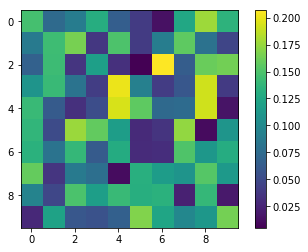

In [5]:
matrix = generate_stochastic_matrix(10)
print(np.round(matrix, 3))
plt.imshow(matrix)
plt.colorbar()
plt.show()

### Агенты со случайным мнением

In [6]:
op = np.random.rand(10)
print(np.round(op, 3))

[0.003 0.38  0.844 0.103 0.944 0.457 0.629 0.618 0.52  0.735]


In [7]:
solution = model_game(matrix, op)
print(np.round(solution, 3))

[[0.111 0.088 0.101 0.088 0.111 0.086 0.089 0.099 0.136 0.091]
 [0.111 0.088 0.101 0.088 0.111 0.086 0.089 0.099 0.136 0.091]
 [0.111 0.088 0.101 0.088 0.111 0.086 0.089 0.099 0.136 0.091]
 [0.111 0.088 0.101 0.088 0.111 0.086 0.089 0.099 0.136 0.091]
 [0.111 0.088 0.101 0.088 0.111 0.086 0.089 0.099 0.136 0.091]
 [0.111 0.088 0.101 0.088 0.111 0.086 0.089 0.099 0.136 0.091]
 [0.111 0.088 0.101 0.088 0.111 0.086 0.089 0.099 0.136 0.091]
 [0.111 0.088 0.101 0.088 0.111 0.086 0.089 0.099 0.136 0.091]
 [0.111 0.088 0.101 0.088 0.111 0.086 0.089 0.099 0.136 0.091]
 [0.111 0.088 0.101 0.088 0.111 0.086 0.089 0.099 0.136 0.091]]


#### Итоговое мнение

In [8]:
print(np.round(solution.dot(op), 3))

[0.527 0.527 0.527 0.527 0.527 0.527 0.527 0.527 0.527 0.527]


### Агенты, распределенные между игроками

In [9]:
first_limits = (-20, -1)
second_limits = (1, 20)
nobody_limits = (-50, 50)

#### Распределение между игроками

In [10]:
distr = distribute_players(2, 10)
print(distr)

[0 2 1 2 1 0 2 0 2 0]


#### Инициализация исходных мнений

In [11]:
op = generate_opinions(distr, first_limits, second_limits, nobody_limits)
print(np.round(op, 3))

[ 21.635  11.631  -4.047   6.396 -16.865  34.287   6.251  17.701  16.445
 -33.341]


In [12]:
solution = model_game(matrix, op)
print(np.round(solution, 3))

[[0.111 0.088 0.101 0.088 0.111 0.086 0.089 0.099 0.136 0.091]
 [0.111 0.088 0.101 0.088 0.111 0.086 0.089 0.099 0.136 0.091]
 [0.111 0.088 0.101 0.088 0.111 0.086 0.089 0.099 0.136 0.091]
 [0.111 0.088 0.101 0.088 0.111 0.086 0.089 0.099 0.136 0.091]
 [0.111 0.088 0.101 0.088 0.111 0.086 0.089 0.099 0.136 0.091]
 [0.111 0.088 0.101 0.088 0.111 0.086 0.089 0.099 0.136 0.091]
 [0.111 0.088 0.101 0.088 0.111 0.086 0.089 0.099 0.136 0.091]
 [0.111 0.088 0.101 0.088 0.111 0.086 0.089 0.099 0.136 0.091]
 [0.111 0.088 0.101 0.088 0.111 0.086 0.089 0.099 0.136 0.091]
 [0.111 0.088 0.101 0.088 0.111 0.086 0.089 0.099 0.136 0.091]]


#### Итоговое мнение

In [13]:
print(np.round(solution.dot(op), 3))

[6.166 6.166 6.166 6.166 6.166 6.166 6.166 6.166 6.166 6.166]
